### Python For Economics Assignment 01

20180594 이정훈

#### 1. 사용된 기본 Packages와 음원 Data

numpy, matplotlib, Audio, requests 등의 모듈이 사용되었으며, 음원은 laugh와 woosh로 총 두개가 사용되었다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy. fft import fft, ifft
import requests

In [2]:
url = "https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/kid_laugh.wav"
laugh = requests.get(url).content
with open('kid_laugh.wav', 'wb') as f:
    f.write(laugh)
fs, data = read('kid_laugh.wav')

data = data[:,0]
Audio(data, rate = fs)

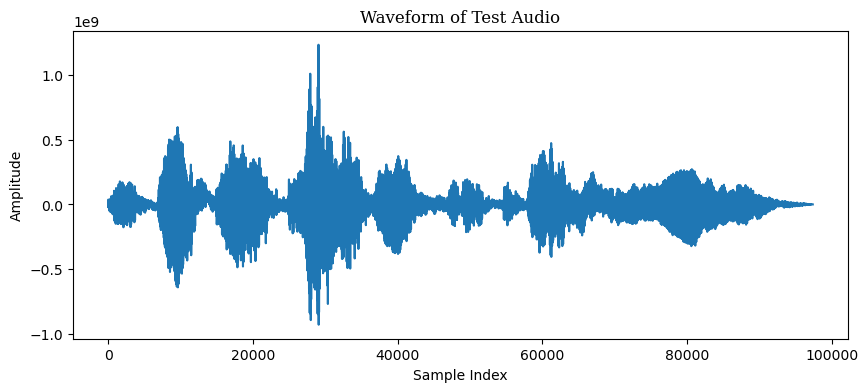

In [3]:
plt.figure(figsize = (10,4))
plt.plot(data)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Waveform of Test Audio', fontsize = 12, fontfamily = 'Serif')
plt.show()

**1.1 예제 : sample rate**

위 파일의 sample rate은 44,100이므로 이를 주어진 비율로 줄이는 함수를 만들어 보자

In [4]:
fs, data = read('kid_laugh.wav')

def down_sampling(sample, fs, by):
    step = int(1 / by)
    return int(fs*by), data[::step, :]

rate, downsample = down_sampling(data, fs, 0.1)
Audio(downsample.T, rate = rate)

#### 2. Homework
**2.1 Reversing Sound**

역재생은 sample의 순서를 뒤집어 놓은 것이다. 음원을 거꾸로 재생하는 함수를 만든다.

In [5]:
def reverse_play(sample, fs = 44100):
    return int(fs), np.flip(sample, axis = 0) 

fs, rev_sound = reverse_play(data)
Audio(rev_sound.T, rate = fs)

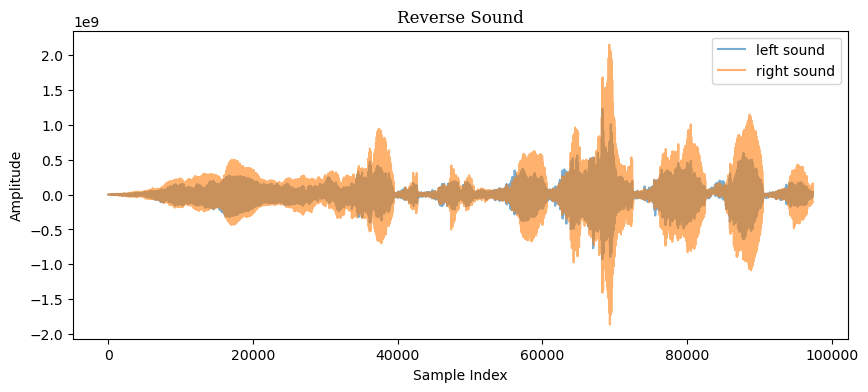

In [6]:
plt.figure(figsize = (10,4))
plt.plot(rev_sound, alpha = 0.6)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(['left sound','right sound'])
plt.title('Reverse Sound', fontsize = 12, fontfamily = 'Serif')
plt.show()

### 2.2 Volume Scale

- 음압을 조정한다. scale만 변화시키면 된다.
- 오디오기기의 볼륨과 같이 log scale로 소리를 크고 작게하는 함수를 만든다.

$$\mbox{level} = 20 \log_{10} \frac{\mbox{volume}}{\mbox{default volume}}$$

- level 0은 원래 음량에 해당하며 level 1은 원래 음량의 1.12배, level = 6은 2배, level 20은 10배에 해당한다.

In [7]:
def amplify(sample_level, fs = 44100):
    return int(fs), data * 10 ** (sample_level/20)

fs, amplified = amplify(sample_level = 6)
Audio(amplified.T, rate=fs)

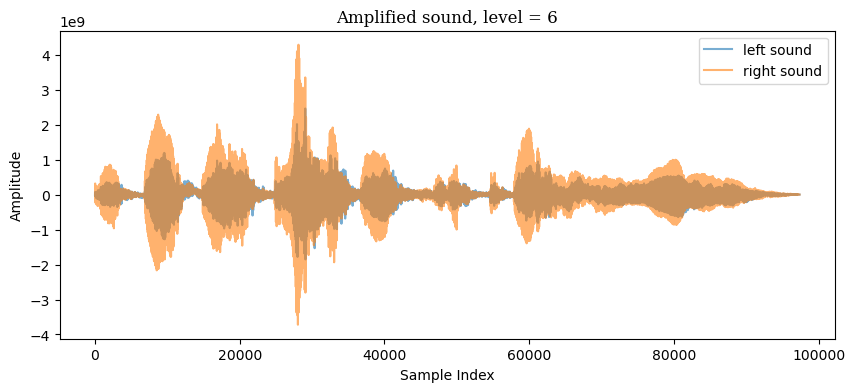

In [8]:
plt.figure(figsize = (10,4))
plt.plot(amplified, alpha = 0.6)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(['left sound','right sound'])
plt.title('Amplified sound, level = 6', fontsize = 12, fontfamily = 'Serif')
plt.show()

**2.3 Echo**

- sample rate 기준 10 ~ 20% 정도 delay를 주고 이를 몇 번 반복해서 삽입한다.
- delay의 단위는 초, 반복할 때는 음량을 이전 효과의 20~25\% 수준으로 감소시킨다.
- 소리는 매 1초마다 2번 반복되며 따라서 재생시간은 2초 늘어난다.

In [9]:
def echo_effect(sample, fs, delay, repeat, effect):
    data = sample
    for i in range(repeat):
        sample = np.r_[data,np.zeros((int(fs*delay)*(i+1),2))] + np.r_[np.zeros((int(fs*delay),2)),sample*(1-effect)]
    return sample

echo = echo_effect(data, fs=44100, delay=1, repeat=2, effect=.2)
Audio(echo.T, rate=fs)

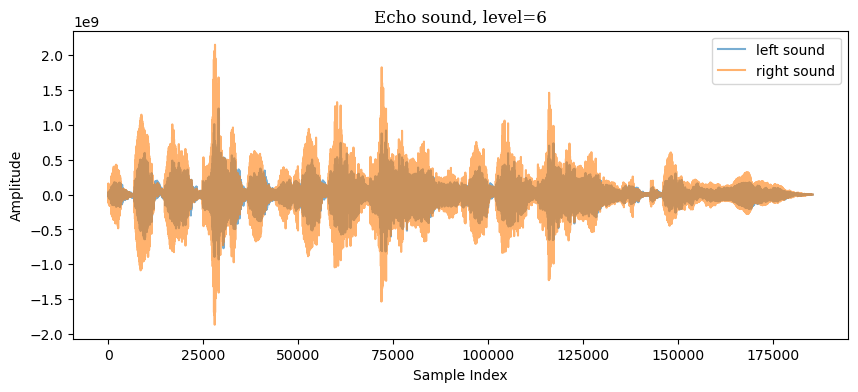

In [10]:
plt.figure(figsize = (10,4))
plt.plot(echo, alpha = 0.6)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(['left sound','right sound'])
plt.title('Echo sound, level=6', fontsize = 12, fontfamily = 'Serif')
plt.show()

**2.4 Mixing Sounds**

- mixing은 여러 음원을 동시에 재생한다는 의미이다. 즉 각 위치의 sample value를 더하여 구한다.
- 음압을 더하는 것이므로 너무 많은 음원을 mix하면 그냥 시끄러운 소리가 되어 버린다. (clipping)
- 청각의 특징으로 인해 몇 가지 소리를 더하는 것으로는 큰 차이를 느끼지는 못한다.
- $\omega = (\omega_1,\omega_2,⋯,\omega_k),∑\omega_i=1$ 을 가중값으로 각 음원을 더하는 함수를 만든다.
- 길이가 다른 음원들을 더해 얻은 파일의 길이는 더한 파일 중 가장 긴 길이의 음원과 같아야 한다.

In [11]:
url = "https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/kid_laugh.wav"
laugh = requests.get(url).content
with open('kid_laugh.wav', 'wb') as f:
    f.write(laugh)
fs, data = read('kid_laugh.wav')
data = data[:,0]

url = "https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/woosh.wav"
woosh = requests.get(url).content
with open('woosh.wav', 'wb') as f:
    f.write(woosh)
fs, woosh = read('woosh.wav')
woosh = woosh[:,0]

In [12]:
def mixing(data, weight):  
    if data[0].size < data[1].size :
        mix = (weight[0]*np.resize(data[0], data[1].shape))+(data[1]*weight[1])    
    else :
        mix = (weight[1]*np.resize(data[1], data[0].shape))+(data[0]*weight[0])
    return fs, mix

fs, mix = mixing([data, woosh], weight=(.4,.6))
Audio(mix.T, rate=fs)

Text(0.5, 1.0, 'Mixing sound')

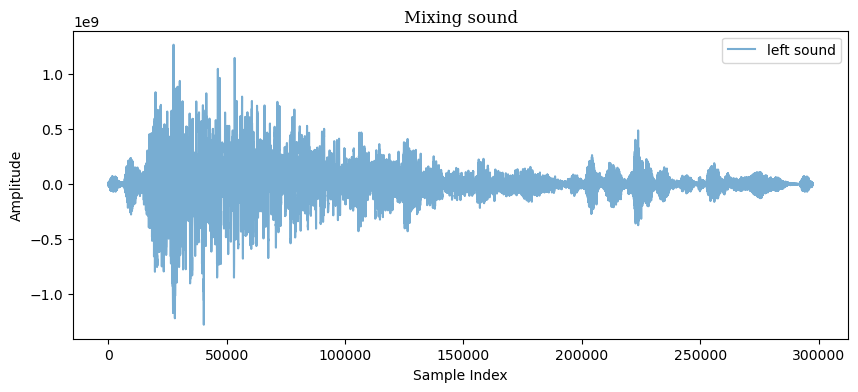

In [13]:
plt.figure(figsize = (10,4))
plt.plot(mix, alpha = 0.6)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(['left sound','right sound'])
plt.title('Mixing sound', fontsize = 12, fontfamily = 'Serif')